# Represented population groups

This analysis aimed to answer the following research questions: 
1. Which African ethnolinguistic population groups are represented by the African genetic data?
2. What are the proportions of samples from Central, Southern, Eastern and Western Africa?

To achieve this, the following steps were performed: 

1. To gain an understanding of the different African ethnolinguistic populations represented by the genetic data, the data was grouped according to ethnolinguistic classification. A bar plot was then generated to visualise the sample counts for each ethnolinguistic population group.
2. To depict the distribution of samples across Central, Southern, Eastern, and Western African regions, the data was data was further grouped by region and used to construct a pie chart of the proportion of samples from each geographic region.

## Imports

Import relevant libraries and packages

In [22]:
import os
import sys

from dotenv import load_dotenv

load_dotenv()

PROJECT_ROOT = os.getenv("PROJECT_ROOT")
if PROJECT_ROOT not in sys.path:
    os.chdir(PROJECT_ROOT + "/Notebooks")
    sys.path.append(PROJECT_ROOT)

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import Utils.constants as constants
import Utils.functions as functions

## Data loading

Import the processed sample population data from the `Data/Processed/Sample_populations.csv` file. This file includes the following information:

- `SAMPLE_NAME`: The unique identifier for each sample.
- `SUB`: The African ethnolinguistic classification of each sample, also known as the subpopulation group. The possible classifications are:
  - Mandinka
  - Esan
  - Mende
  - Mbuti Pygmy
  - Biaka Pygmy
  - Mandenka
  - Yoruba (HGDP and 1000G)
  - San
  - Bantu South Africa
  - Luhya
- `REG`: The regional classification of the sample's ethnolinguistic group. The possible regions are:
  - Central Africa (CA)
  - Southern Africa (SA)
  - Eastern Africa (EA)
  - Western Africa (WA)

In [23]:
sample_subpopulations = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Data",
        "Processed",
        "Sample_populations.csv",
    )
)

sample_subpopulations.head(5)

,SUB,SAMPLE_NAME,REG
0,Mandinka,HG02461,WA
1,Mandinka,HG02462,WA
2,Mandinka,HG02464,WA
3,Mandinka,HG02465,WA
4,Mandinka,HG02561,WA


## Data analysis and visualisation

### Data exploration

Conduct a brief exploration of the data to determine the number of samples present and whether missing values are present.

Are there any missing values?

In [24]:
sample_subpopulations.isnull().any()

SUB            False
SAMPLE_NAME    False
REG            False
dtype: bool

How many samples are present?

In [25]:
sample_subpopulations["SAMPLE_NAME"].count()

610

Which subpopulation groups are present? 

In [26]:
sample_subpopulations["SUB"].unique()

array(['Mandinka', 'Esan', 'Mende', 'Mbuti Pygmy', 'Biaka Pygmy',
       'Mandenka', 'Yoruba', 'San', 'Bantu South Africa', 'Bantu Kenya',
       'Luhya'], dtype=object)

### Data Aggregation

Aggregate the sample data by sample ethnolinguistic classification (subpopulation) group to enable a comparison of the sample sizes for each ethnolinguistic group.

In [27]:
# Group data by sample subpopulation

grouped_sample_subpopulations = (
    functions.group_and_count(sample_subpopulations, ["SUB"])
    .reset_index()
    .rename(columns={"SAMPLE_NAME": "SAMPLE_COUNT"})
    .drop(columns="REG")
)

# Add regional information

grouped_sample_subpopulations["REG"] = grouped_sample_subpopulations["SUB"].map(
    constants.REGIONAL_CLASSIFICATION
)

grouped_sample_subpopulations

,SUB,SAMPLE_COUNT,REG
0,Bantu Kenya,10,EA
1,Bantu South Africa,8,SA
2,Biaka Pygmy,22,CA
3,Esan,103,WA
4,Luhya,92,EA
5,Mandenka,20,WA
6,Mandinka,116,WA
7,Mbuti Pygmy,12,CA
8,Mende,83,WA
9,San,6,SA


Aggregate the sample data by regional classification to enable a comparison of the sample sizes for each region.

In [28]:
grouped_regions = (
    grouped_sample_subpopulations.groupby("REG").sum(numeric_only=True).reset_index()
)
grouped_regions

,REG,SAMPLE_COUNT
0,CA,34
1,EA,102
2,SA,14
3,WA,460


### Data visualisation

Set plot parameters

In [29]:
plt.rc("font", size=constants.MEDIUM_FONT)  # controls default text sizes
plt.rc("axes", titlesize=constants.MEDIUM_FONT)  # fontsize of the axes title
plt.rc("axes", labelsize=constants.BIGGER_FONT)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("legend", fontsize=constants.MEDIUM_FONT)  # legend fontsize
plt.rc("figure", titlesize=constants.BIGGER_FONT)  # fontsize of the figure title

Visualise the sample counts per ethnolinguistic group, colour coded by regional classification.

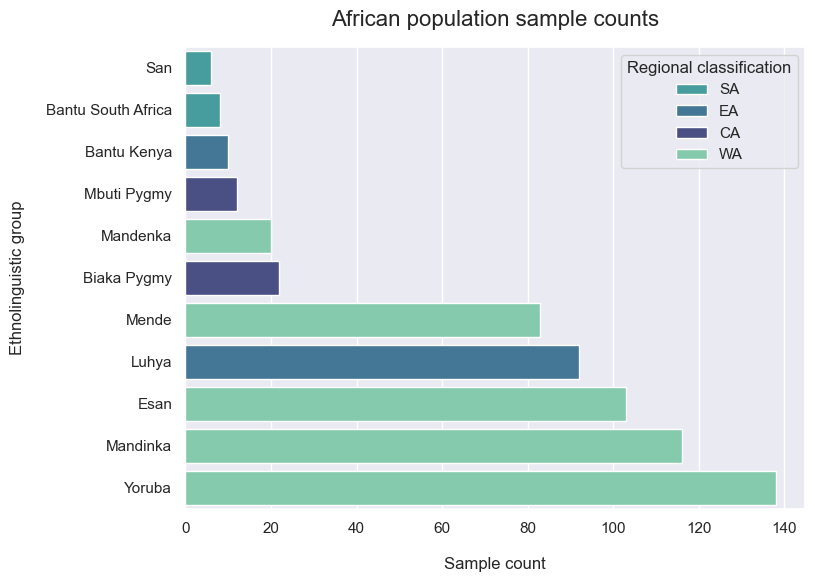

In [32]:
# Define figure size
sns.set(rc={"figure.figsize": (8, 6)})

# Define a custom colour palette for plot
color_dict = dict({"SA": "#38AAAC", "EA": "#357BA3", "CA": "#40498E", "WA": "#79D6AE"})
values = grouped_sample_subpopulations.REG.values

# Construct barplot
variant_barplot = functions.create_plot(
    plot_type="barplot",
    x="SAMPLE_COUNT",
    y="SUB",
    palette=color_dict,
    data=grouped_sample_subpopulations.sort_values("SAMPLE_COUNT"),
    hue="REG",
    order=grouped_sample_subpopulations.sort_values("SAMPLE_COUNT").SUB,
    dodge=False,
)

plt.xlabel(xlabel="Sample count", labelpad=15)
plt.ylabel(ylabel="Ethnolinguistic group", labelpad=15)
plt.legend(title="Regional classification", loc="upper right")
plt.title("African population sample counts", size=constants.LARGEST_FONT, pad=15)

plt.savefig(
    r"..\Results\Figures\1a-Sample_population_counts.png", dpi=1200, bbox_inches="tight"
)
plt.show()

From the plot above we can see that the individuals from which genomic data was gathered were representative of 11 ethnolinguistic sub-population groups from Western Africa (WA), Southern Africa (SA), Eastern Africa (EA), and Central Africa (CA). The most represented ethnolinguistic groups, were the Yoruba and Mandinka from Western Africa, while the least represented groups were the San and Bantu Groups from Southern Africa.

Visualise the regional distribution of samples using a pie chart.

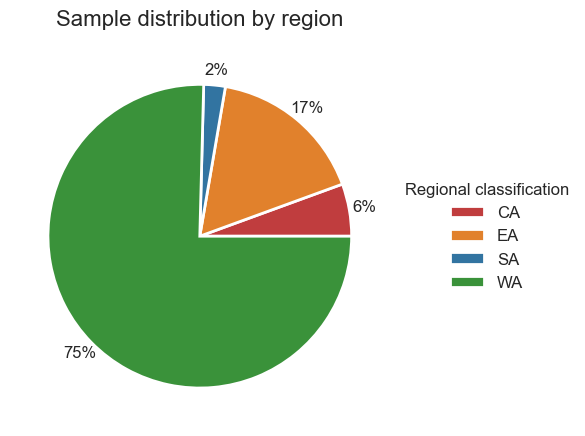

In [33]:
# Create pie chart of sample count per region

color_dict = dict({"SA": "#3274A1", "EA": "#E1812C", "CA": "#C03D3E", "WA": "#3A923A"})

values = grouped_regions.REG.values

fig, ax = plt.subplots(figsize=(6, 6))
patches, texts, pcts = plt.pie(
    data=grouped_regions,
    x="SAMPLE_COUNT",
    colors=[color_dict[key] for key in values],
    autopct="%.0f%%",
    wedgeprops={"linewidth": 2.0, "edgecolor": "white"},
    pctdistance=1.1,
    labeldistance=1.2,
)

ax.legend(
    patches,
    values,
    title="Regional classification",
    fontsize=12,
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
)

plt.title("Sample distribution by region", size=constants.LARGEST_FONT, pad=15)
plt.tight_layout()
plt.savefig(
    r"..\Results\Figures\1b-Sample_region_proportions.png", dpi=1200, bbox_inches="tight"
)
plt.show()

From the plot above, we can see that Southern Africa (SA) and Central Africa (CA) were under-represented in the African genomic data. The majority of the individuals from which genomic data was gathered were from Western Africa (WA).